# Ahmet Furkan Ün
# EM1SNO

## Exercise 1a

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def composite_midpoint(f, a, b, N):
    h = (b - a) / N
    x_midpoints = np.linspace(a + h / 2, b - h / 2, N)
    return h * np.sum(f(x_midpoints))

composite_midpoint(np.sin, 0, np.pi / 2, 100000)

1.0000000000102807

In [2]:
def composite_trapezoidal(f, a, b, N):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    return (h / 2) * (f(a) + 2 * np.sum(f(x[1:N])) + f(b))

composite_trapezoidal(np.sin, 0, np.pi / 2, 100000)

0.999999999979438

In [3]:
def simpsons_rule(f, a, b, N):
    if N % 2 == 1:  # Simpson's rule requires an even number of intervals
        N += 1
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    return (h / 3) * (f(a) + 4 * np.sum(f(x[1:N:2])) + 2 * np.sum(f(x[2:N-1:2])) + f(b))

simpsons_rule(np.sin, 0, np.pi / 2, 100000)

0.9999999999999998

## Exercise 1b

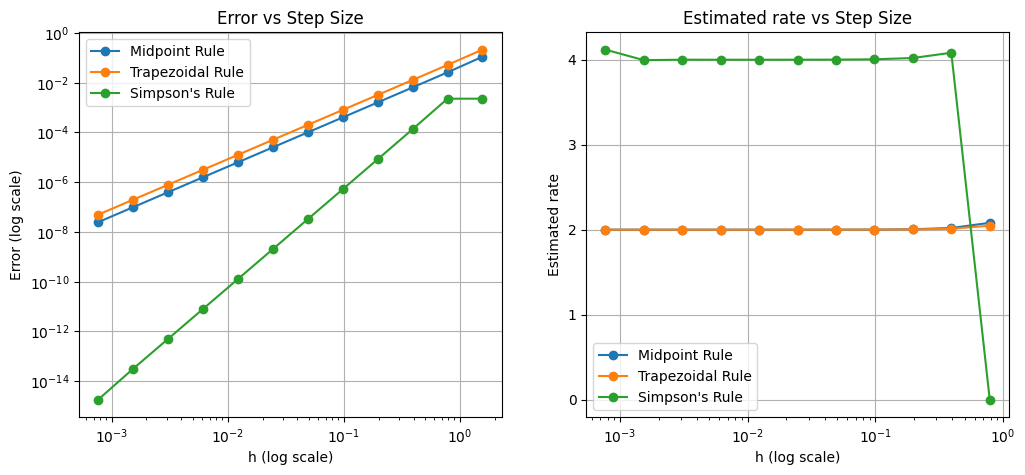

In [4]:
def compute_errors_and_rate(rule, f, a, b, exact_value, N_values):
    errors = []
    rates = []
    h_values = []
    for N in N_values:
        h = (b - a) / N
        approx_value = rule(f, a, b, N)
        error = abs(approx_value - exact_value)
        errors.append(error)
        h_values.append(h)
        
        if len(errors) > 1:
            rates.append(np.log2(errors[-2]/errors[-1]))
    
    return errors, h_values, rates


exact_value = 1
N_values = [2**i for i in range(12)]

errors_midpoint, h_midpoint, rates_midpoint = compute_errors_and_rate(composite_midpoint, np.sin, 0, np.pi/2, exact_value, N_values)
errors_trapezoidal, h_trapezoidal, rates_trapezoidal = compute_errors_and_rate(composite_trapezoidal, np.sin, 0, np.pi/2, exact_value, N_values)
errors_simpson, h_simpson, rates_simpson = compute_errors_and_rate(simpsons_rule, np.sin, 0, np.pi/2, exact_value, N_values)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].loglog(h_midpoint, errors_midpoint, label=f'Midpoint Rule', marker='o')
axs[0].loglog(h_trapezoidal, errors_trapezoidal, label=f'Trapezoidal Rule', marker='o')
axs[0].loglog(h_simpson, errors_simpson, label=f'Simpson\'s Rule', marker='o')
axs[0].set_xlabel('h (log scale)')
axs[0].set_ylabel('Error (log scale)')
axs[0].set_title('Error vs Step Size')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(h_midpoint[1:], rates_midpoint, label=f'Midpoint Rule', marker='o')
axs[1].plot(h_trapezoidal[1:], rates_trapezoidal, label=f'Trapezoidal Rule', marker='o')
axs[1].plot(h_simpson[1:], rates_simpson, label=f'Simpson\'s Rule', marker='o')
axs[1].set_xscale('log')
axs[1].set_xlabel('h (log scale)')
axs[1].set_ylabel('Estimated rate')
axs[1].set_title('Estimated rate vs Step Size')
axs[1].legend()
axs[1].grid(True)
plt.show()


- **Midpoint Rule**: The error decreases at a rate of $O(h^2)$, so the slope of the line on the log-log plot is approximately 2 and estimated rate converges to 2.
- **Trapezoidal Rule**: The error decreases at a rate of $O(h^2)$, so the slope of the line on the log-log plot is approximately 2 and estimated rate converges to 2.
- **Simpson's Rule**: The error decreases at a faster rate of $O(h^4)$, so the slope of the line on the log-log plot is approximately 4 and estimated rate converges to 4.

## Exercise 1c

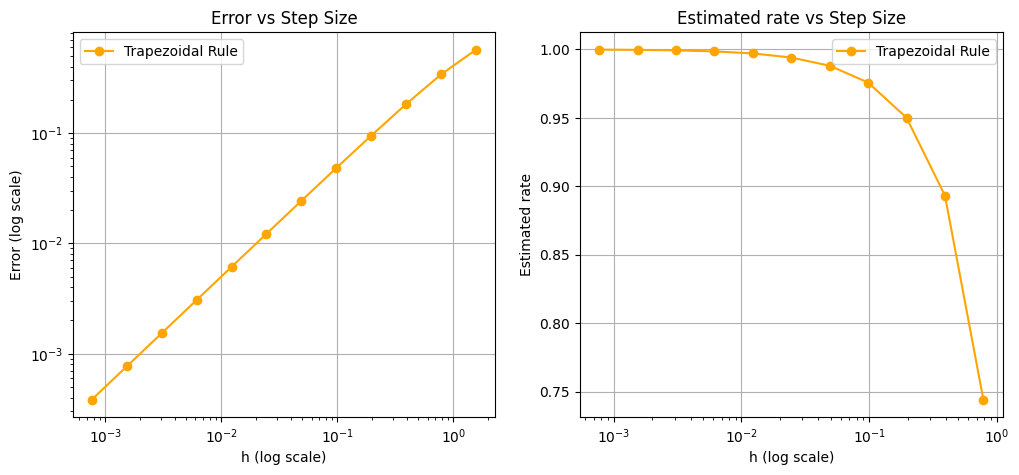

In [5]:
def incorrect_trapezoidal(f, a, b, N):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    return h * np.sum(f(x))

errors_trapezoidal, h_trapezoidal, rates_trapezoidal = compute_errors_and_rate(incorrect_trapezoidal, np.sin, 0, np.pi/2, exact_value, N_values)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].loglog(h_trapezoidal, errors_trapezoidal, label=f'Trapezoidal Rule', marker='o', color="orange")
axs[0].set_xlabel('h (log scale)')
axs[0].set_ylabel('Error (log scale)')
axs[0].set_title('Error vs Step Size')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(h_trapezoidal[1:], rates_trapezoidal, label=f'Trapezoidal Rule', marker='o',  color="orange")
axs[1].set_xscale('log')
axs[1].set_xlabel('h (log scale)')
axs[1].set_ylabel('Estimated rate')
axs[1].set_title('Estimated rate vs Step Size')
axs[1].legend()
axs[1].grid(True)
plt.show()

If we mistakenly set all the weights to $h$ instead of using the correct trapezoidal rule's weights $\frac{h}{2}$ for the endpoints, this will degrade the method’s accuracy. The correct trapezoidal rule has an error order of $O(h^2)$, but with uniform weights, the convergence rate reduced to $O(h)$ 

## Exercise 2a

In [6]:
def euler_method(y0, T, N):
    h = T / N
    t_values = np.linspace(0, T, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0
    for n in range(N):
        y_values[n+1] = y_values[n] + h * f(t_values[n], y_values[n])
    return t_values, y_values

def newtons_method(f, df, x0, precision=1e-4):
    xk = x0
    iterations = 0
    while abs(f(xk)) > precision:
        if df(xk) != 0:
            xk = xk - f(xk) / df(xk)
            iterations += 1
        else:
            print(f"Iteration {iterations}. Derivative is 0. No solution!")
            break
    return xk, iterations

def backward_euler_method_newton(y0, T, N):
    h = T / N
    t_values = np.linspace(0, T, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        f_bwd_euler = lambda y_next: y_next - y_values[n] - h * (y_next - y_next**3)
        df_bwd_euler = lambda y_next: 1 - h * (1 - 3 * y_next**2)
        
        y_values[n+1], _ = newtons_method(f_bwd_euler, df_bwd_euler, y_values[n])
    
    return t_values, y_values

def crank_nicolson_method_newton(y0, T, N):
    h = T / N
    t_values = np.linspace(0, T, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        f_cn = lambda y_next: y_next - y_values[n] - (h/2) * ((y_values[n] - y_values[n]**3) + (y_next - y_next**3))
        df_cn = lambda y_next: 1 - (h/2) * (1 - 3 * y_next**2)
        
        y_values[n+1], _ = newtons_method(f_cn, df_cn, y_values[n])
    
    return t_values, y_values



## Exercise 2b

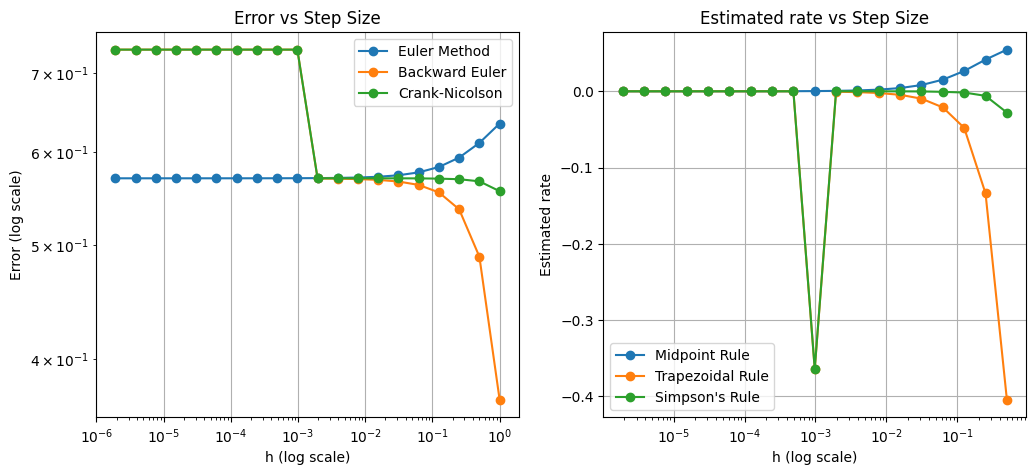

Is Euler rate stable? True
Is Backward Euler rate stable? True
Is Crank-Nicolson rate stable? True


In [10]:
def f(t, y):
    return y - y**3

def compute_errors_and_rate_ode(method, exact_solution, y0, T, N_values):
    errors = []
    h_values = []
    rates = []
    exact_value = exact_solution(T, y0)
    
    for N in N_values:
        h = T / N
        t_values, y_values = method(y0, T, N,)
        approx_value = y_values[-1]  # Solution at t = T
        error = abs(approx_value - exact_value)
        errors.append(error)
        h_values.append(h)
        
        if len(errors) > 1:
            rates.append(np.log2(errors[-2]/errors[-1]))
            
    return errors, h_values, rates

def check_rate_stability(rates, precision=0.01):
    if abs(rates[-1] - rates[-2]) <= precision and abs(round(rates[-1]) - rates[-1]) <= precision:
        return True
    return False

def exact_solution(t, y0):
    return np.sqrt(y0 / (y0**2 + (1 - y0**2) * np.exp(-2 * t)))

N_values = [2**i for i in range(20)]

errors_euler, h_euler, rates_euler = compute_errors_and_rate_ode(euler_method, exact_solution, 0.1, 1, N_values)
errors_backward_euler, h_backward_euler, rates_backward_euler = compute_errors_and_rate_ode(backward_euler_method_newton, exact_solution, 0.1, 1, N_values)
errors_crank_nicolson, h_crank_nicolson, rates_crank_nicolson = compute_errors_and_rate_ode(crank_nicolson_method_newton, exact_solution, 0.1, 1, N_values)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].loglog(h_euler, errors_euler, label=f'Euler Method', marker='o')
axs[0].loglog(h_backward_euler, errors_backward_euler, label=f'Backward Euler', marker='o')
axs[0].loglog(h_crank_nicolson, errors_crank_nicolson, label=f'Crank-Nicolson', marker='o')
axs[0].set_xlabel('h (log scale)')
axs[0].set_ylabel('Error (log scale)')
axs[0].set_title('Error vs Step Size')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(h_euler[1:], rates_euler, label=f'Midpoint Rule', marker='o')
axs[1].plot(h_backward_euler[1:], rates_backward_euler, label=f'Trapezoidal Rule', marker='o')
axs[1].plot(h_crank_nicolson[1:], rates_crank_nicolson, label=f'Simpson\'s Rule', marker='o')
axs[1].set_xscale('log')
axs[1].set_xlabel('h (log scale)')
axs[1].set_ylabel('Estimated rate')
axs[1].set_title('Estimated rate vs Step Size')
axs[1].legend()
axs[1].grid(True)
plt.show()

print("Is Euler rate stable?", check_rate_stability(rates_euler))
print("Is Backward Euler rate stable?", check_rate_stability(rates_backward_euler))
print("Is Crank-Nicolson rate stable?", check_rate_stability(rates_crank_nicolson))